# Предсказание поведения пользователей в маркетплейсе

# <span style='color:RoyalBlue'>Описание проекта</span>

<span style='font-size:18px'>

Интернет-магазин собирает историю покупателей, проводит рассылки предложений и
планирует будущие продажи. Для оптимизации процессов надо выделить пользователей,
которые готовы совершить покупку в ближайшее время.

# <span style='color:RoyalBlue'>Цели иследования</span>

<span style='font-size:18px'>
- Предсказать вероятность покупки в течение 90 дней.

# <span style='color:RoyalBlue'>Описание данных</span>

<span style="font-size: 18px;">**Фаил даннных для иследования: `apparel-purchases.csv` со следующими колонками:**</span>

- <span style='color:red'>**client_id**</span> — идентификатор клиента;
- <span style='color:blue'>**quantity**</span> — количество единиц товара;
- <span style='color:blue'>**price**</span> — цена товара;
- <span style='color:red'>**category_ids**</span> — идентификаторы категорий;
- <span style='color:blue'>**date**</span> — дата покупки;
- <span style='color:red'>**message_id**</span> — идентификатор сообщения из рассылки.
<span style='font-size:18px'>
Данные о покупках клиентов по дням и по товарам. В каждой записи покупка
определенного товара, его цена, количество штук.

В таблице есть списки идентификаторов, к каким категориям относится товар. Часто
это вложенные категории (например автотовары-аксессуары-освежители), но также может
включать в начале списка маркер распродажи или маркер женщинам/мужчинам.

Нумерация категорий сквозная для всех уровней, то есть 44 на второй позиции списка
или на третьей – это одна и та же категория. Иногда дерево категорий обновляется, поэтому
могут меняться вложенности, например ['4', '28', '44', '1594'] или ['4', '44', '1594']. Как
обработать такие случаи – можете предлагать свои варианты решения.

<span style="font-size: 18px;">**Фаил даннных для иследования: `apparel-messages.csv` со следующими колонками:**</span>

- <span style='color:red'>**bulk_campaign_id**</span> — идентификатор рассылки;
- <span style='color:red'>**client_id**</span> — идентификатор клиента;
- <span style='color:red'>**message_id**</span> — идентификатор сообщения;
- <span style='color:blue'>**event**</span> — действие с сообщением (отправлено, открыто, покупка…);
- <span style='color:blue'>**channel**</span> — канал рассылки;
- <span style='color:blue'>**date**</span> — дата действия;
- <span style='color:blue'>**created_at**</span> — дата-время полностью;
<span style='font-size:18px'>
Рассылки, которые были отправлены клиентам из таблицы покупок.

<span style="font-size: 18px;">**Фаил даннных для иследования: `apparel-target_binary.csv` со следующими колонками:**</span>

- <span style='color:red'>**client_id**</span> — идентификатор клиента;
- <span style='color:green'>**target**</span> — клиент совершил покупку в целевом периоде.

<span style="font-size: 18px;">**Фаил даннных для иследования: `full_campaign_daily_event.csv` со следующими колонками:**</span>

- <span style='color:blue'>**date**</span> — дата;
- <span style='color:red'>**bulk_campaign_id**</span> — идентификатор рассылки;
- <span style='color:blue'>**count_event<span style='color:red'>*</span>**</span> — общее количество каждого события event;
- <span style='color:blue'>**nunique_event<span style='color:red'>*</span>**</span> — количество уникальных client_id в каждом событии.
<span style='font-size:18px'>
<span style='color:red'>*</span><b>в именах колонок найдете все типы событий event</b>

Агрегация общей базы рассылок по дням и типам событий

<span style="font-size: 18px;">**Фаил даннных для иследования: `full_campaign_daily_event_channel.csv` со следующими колонками:**</span>

- <span style='color:blue'>**date**</span> — дата;
- <span style='color:red'>**bulk_campaign_id**</span> — идентификатор рассылки;
- <span style='color:blue'>**count_event*_channel<span style='color:red'>*</span>**</span> — общее количество каждого события по каналам;
- <span style='color:blue'>**nunique_event*_channel<span style='color:red'>*</span>**</span> — количество уникальных client_id по событиям и каналам.
<span style='font-size:18px'>
<span style='color:red'>*</span><b>в именах колонок есть все типы событий event и каналов рассылки channel</b>

Агрегация по дням с учетом событий и каналов рассылки

# <span style='color:RoyalBlue'>Содержание</span>

- <span style='font-size: 18px;color: RoyalBlue'>Описание проекта</span>
- <span style='font-size: 18px;color: RoyalBlue'>Цели иследования</span>
- <span style='font-size: 18px;color: RoyalBlue'>Описание данных</span>
- <span style='font-size: 18px;color: RoyalBlue'>Содержание</span>
- <span style='font-size: 18px;color: Blue'>1. Шаг. Подгруска необходимых модулей и настройка необходимых констант</span>
- <span style='font-size: 18px;color: Blue'>2. Шаг. Загрузка данных</span>
- <span style='font-size: 18px;color: Blue'>3. Шаг. Предобработка данных</span>
- <span style='font-size: 18px;color: Blue'>4. Шаг. Исследовательский анализ данных</span>
- <span style='font-size: 18px;color: Blue'>5. Шаг. Объеденения датафреймов</span>
- <span style='font-size: 18px;color: Blue'>6. Шаг. Разработка полезных признаков
- <span style='font-size: 18px;color: Blue'>7. Шаг. Корреляционный анализ</span>
- <span style='font-size: 18px;color: Blue'>8. Шаг. Подготовка к обучению</span>
- <span style='font-size: 18px;color: Blue'>9. Шаг. Обучение улучшей модели</span>
- <span style='font-size: 18px;color: Blue'>10. Шаг. Проанализируйте проведёное тестирование</span>
- <span style='font-size: 18px;color: RoyalBlue'>Итоговые выводы</span>

## <span style='color:Blue'>Шаг. Подгруска необходимых модулей и настройка необходимых констант</span>

In [1]:
# Тихая установка нужных библиотек

#!pip install matplotlib==3.9.4 -q
#!pip install pandas==2.2.3 -q
#!pip install seaborn==0.13.2 -q
#!pip install numpy==1.23.0 -q
#!pip install numba==0.60.0 -q
#!pip install llvmlite==0.43.0 -q
#!pip install shap==0.44.0 -q
#!pip install phik==0.12.4 -q
#!pip install pyarrow==10.0.1 -q
#!pip install scikit-learn==1.6.1 -q
#!pip install sklearn-compat==0.1.4 -q
#!pip install imbalanced-learn==0.12.4 -q
#!pip install catboost==1.2.8 -q
#!pip install lightgbm==4.6.0 -q
#!pip install jinja2==3.1.2 -q
#!pip install wordcloud==1.9.4 -q
#!pip install Pillow==9.5.0 -q

#!pip freeze

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import (
    train_test_split,
    RandomizedSearchCV,
)
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from scipy.stats import randint, uniform
from warnings import simplefilter

import phik
from wordcloud import WordCloud

In [3]:
# Вывод ошибок
simplefilter(action='ignore', category=FutureWarning)
# Настройки numpy
np.seterr(divide = 'ignore');
# Настройки pandas
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
# Создадим константы
RANDOM_STATE = 12345
TEST_SIZE = 0.25

In [5]:
# Общий путь к папккам
folder_location = './datasets/'

## <span style='color:Blue'> Шаг. Загрузка данных</span>

**Задача 2.1. Создание финкции вывода первичной информации.**

In [6]:
def primary_information_output(dataset):
    # Функция вывод первичной информации
    dataset.info()
    print('Количество пропущеных значений:')
    display(dataset.isna().sum())
    text = 'Количество полных дублированых строк в дата фрейме'
    print(f'{text} = {dataset.duplicated().sum()}')
    display(dataset.head())

**Задача 2.2. Загруска данных из `apparel-purchases.csv` и первое знакомство с датафрейм <span style='color:red'>ap</span>.**

In [7]:
# Прочитываю csv-файл
ap = pd.read_csv(
    f'{folder_location}apparel-purchases.csv',
    sep=',',
    parse_dates=['date',]
)

In [8]:
# Показываю информацию о дата сете
primary_information_output(ap)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202208 entries, 0 to 202207
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   client_id     202208 non-null  int64         
 1   quantity      202208 non-null  int64         
 2   price         202208 non-null  float64       
 3   category_ids  202208 non-null  object        
 4   date          202208 non-null  datetime64[ns]
 5   message_id    202208 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 9.3+ MB
Количество пропущеных значений:


client_id       0
quantity        0
price           0
category_ids    0
date            0
message_id      0
dtype: int64

Количество полных дублированых строк в дата фрейме = 73020


,client_id,quantity,price,category_ids,date,message_id
0,1515915625468169594,1,"1,999.00","['4', '28', '57', '431']",2022-05-16,1515915625468169594-4301-627b661e9736d
1,1515915625468169594,1,"2,499.00","['4', '28', '57', '431']",2022-05-16,1515915625468169594-4301-627b661e9736d
2,1515915625471138230,1,"6,499.00","['4', '28', '57', '431']",2022-05-16,1515915625471138230-4437-6282242f27843
3,1515915625471138230,1,"4,999.00","['4', '28', '244', '432']",2022-05-16,1515915625471138230-4437-6282242f27843
4,1515915625471138230,1,"4,999.00","['4', '28', '49', '413']",2022-05-16,1515915625471138230-4437-6282242f27843


**<span style='color:green'>Мини вывод:</span>**

- Хорошое наименование столбцов
- Присутствуют полные дубли
- Отсутствуют пропуски
- Типу соответствуют
- Столбец `message_id` имеет трёх группавую структуру через `-`. 1) - `client_id`  2) - `bulk_campaign_id` 3) - `<Индификатор сообщения>`

**Задача 2.3. Загруска данных из `apparel-messages.csv` и первое знакомство с датафрейм <span style='color:red'>am</span>.**

In [9]:
# Прочитываю csv-файл
am = pd.read_csv(
    f'{folder_location}apparel-messages.csv',
    sep=',',
    parse_dates=['date', 'created_at']
)

In [10]:
# Показываю информацию о дата сете
primary_information_output(am)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12739798 entries, 0 to 12739797
Data columns (total 7 columns):
 #   Column            Dtype         
---  ------            -----         
 0   bulk_campaign_id  int64         
 1   client_id         int64         
 2   message_id        object        
 3   event             object        
 4   channel           object        
 5   date              datetime64[ns]
 6   created_at        datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 680.4+ MB
Количество пропущеных значений:


bulk_campaign_id    0
client_id           0
message_id          0
event               0
channel             0
date                0
created_at          0
dtype: int64

Количество полных дублированых строк в дата фрейме = 48610


,bulk_campaign_id,client_id,message_id,event,channel,date,created_at
0,4439,1515915625626736623,1515915625626736623-4439-6283415ac07ea,open,email,2022-05-19,2022-05-19 00:14:20
1,4439,1515915625490086521,1515915625490086521-4439-62834150016dd,open,email,2022-05-19,2022-05-19 00:39:34
2,4439,1515915625553578558,1515915625553578558-4439-6283415b36b4f,open,email,2022-05-19,2022-05-19 00:51:49
3,4439,1515915625553578558,1515915625553578558-4439-6283415b36b4f,click,email,2022-05-19,2022-05-19 00:52:20
4,4439,1515915625471518311,1515915625471518311-4439-628341570c133,open,email,2022-05-19,2022-05-19 00:56:52


**<span style='color:green'>Мини вывод:</span>**

- Присутствуют Дубли
- Хорошее наименование
- Соответствуют типу данных
- Отсутствуют пропуски
- Столбец `message_id` имеет трёх группавую структуру через `-`. 1) - `client_id` 2) - `bulk_campaign_id` 3) - `<Индификатор сообщения>`

**Задача 2.4. Загруска данных из `apparel-target_binary.csv` и первое знакомство с датафрейм <span style='color:red'>atb</span>.**

In [11]:
# Прочитываю csv-файл
atb = pd.read_csv(
    f'{folder_location}apparel-target_binary.csv',
    sep=',',
)

In [12]:
# Показываю информацию о дата сете
primary_information_output(atb)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49849 entries, 0 to 49848
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   client_id  49849 non-null  int64
 1   target     49849 non-null  int64
dtypes: int64(2)
memory usage: 779.0 KB
Количество пропущеных значений:


client_id    0
target       0
dtype: int64

Количество полных дублированых строк в дата фрейме = 0


,client_id,target
0,1515915625468060902,0
1,1515915625468061003,1
2,1515915625468061099,0
3,1515915625468061100,0
4,1515915625468061170,0


**<span style='color:green'>Мини вывод:</span>**

- Отсутствуют полных дублей
- Хорошее наименование
- Не соответствуют типу данных `target` лучше будет тип bool
- Отсутствуют пропуски

**Задача 2.5. Загруска данных из `full_campaign_daily_event.csv` и первое знакомство с датафрейм <span style='color:red'>de</span>.**

In [13]:
# Прочитываю csv-файл
de = pd.read_csv(
    f'{folder_location}full_campaign_daily_event.csv',
    sep=',',
    parse_dates=['date',]
)

In [14]:
# Показываю информацию о дата сете
primary_information_output(de)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131072 entries, 0 to 131071
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date                 131072 non-null  datetime64[ns]
 1   bulk_campaign_id     131072 non-null  int64         
 2   count_click          131072 non-null  int64         
 3   count_complain       131072 non-null  int64         
 4   count_hard_bounce    131072 non-null  int64         
 5   count_open           131072 non-null  int64         
 6   count_purchase       131072 non-null  int64         
 7   count_send           131072 non-null  int64         
 8   count_soft_bounce    131072 non-null  int64         
 9   count_subscribe      131072 non-null  int64         
 10  count_unsubscribe    131072 non-null  int64         
 11  nunique_click        131072 non-null  int64         
 12  nunique_complain     131072 non-null  int64         
 13  nunique_hard_b

date                   0
bulk_campaign_id       0
count_click            0
count_complain         0
count_hard_bounce      0
count_open             0
count_purchase         0
count_send             0
count_soft_bounce      0
count_subscribe        0
count_unsubscribe      0
nunique_click          0
nunique_complain       0
nunique_hard_bounce    0
nunique_open           0
nunique_purchase       0
nunique_send           0
nunique_soft_bounce    0
nunique_subscribe      0
nunique_unsubscribe    0
count_hbq_spam         0
nunique_hbq_spam       0
count_close            0
nunique_close          0
dtype: int64

Количество полных дублированых строк в дата фрейме = 0


,date,bulk_campaign_id,count_click,count_complain,count_hard_bounce,count_open,count_purchase,count_send,count_soft_bounce,count_subscribe,...,nunique_open,nunique_purchase,nunique_send,nunique_soft_bounce,nunique_subscribe,nunique_unsubscribe,count_hbq_spam,nunique_hbq_spam,count_close,nunique_close
0,2022-05-19,563,0,0,0,4,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
1,2022-05-19,577,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2022-05-19,622,0,0,0,2,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
3,2022-05-19,634,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2022-05-19,676,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [15]:
# Проверка наименования
de.columns

Index(['date', 'bulk_campaign_id', 'count_click', 'count_complain',
       'count_hard_bounce', 'count_open', 'count_purchase', 'count_send',
       'count_soft_bounce', 'count_subscribe', 'count_unsubscribe',
       'nunique_click', 'nunique_complain', 'nunique_hard_bounce',
       'nunique_open', 'nunique_purchase', 'nunique_send',
       'nunique_soft_bounce', 'nunique_subscribe', 'nunique_unsubscribe',
       'count_hbq_spam', 'nunique_hbq_spam', 'count_close', 'nunique_close'],
      dtype='object')

**<span style='color:green'>Мини вывод:</span>**

- Отсутствуют полных дублей
- Хорошее наименование
- Сложно судить о типе данных нужно проверять каждый как его применять в дальше
- Отсутствуют пропуски

**Задача 2.6. Загруска данных из `full_campaign_daily_event_channel.csv` и первое знакомство с датафрейм <span style='color:red'>deс</span>.**

In [16]:
# Прочитываю csv-файл
dec = pd.read_csv(
    f'{folder_location}full_campaign_daily_event_channel.csv',
    sep=',',
    parse_dates=['date',]
)

In [17]:
# Показываю информацию о дата сете
primary_information_output(dec)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131072 entries, 0 to 131071
Data columns (total 36 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   date                             131072 non-null  datetime64[ns]
 1   bulk_campaign_id                 131072 non-null  int64         
 2   count_click_email                131072 non-null  int64         
 3   count_click_mobile_push          131072 non-null  int64         
 4   count_open_email                 131072 non-null  int64         
 5   count_open_mobile_push           131072 non-null  int64         
 6   count_purchase_email             131072 non-null  int64         
 7   count_purchase_mobile_push       131072 non-null  int64         
 8   count_soft_bounce_email          131072 non-null  int64         
 9   count_subscribe_email            131072 non-null  int64         
 10  count_unsubscribe_email          131072 non-

date                               0
bulk_campaign_id                   0
count_click_email                  0
count_click_mobile_push            0
count_open_email                   0
count_open_mobile_push             0
count_purchase_email               0
count_purchase_mobile_push         0
count_soft_bounce_email            0
count_subscribe_email              0
count_unsubscribe_email            0
nunique_click_email                0
nunique_click_mobile_push          0
nunique_open_email                 0
nunique_open_mobile_push           0
nunique_purchase_email             0
nunique_purchase_mobile_push       0
nunique_soft_bounce_email          0
nunique_subscribe_email            0
nunique_unsubscribe_email          0
count_hard_bounce_mobile_push      0
count_send_mobile_push             0
nunique_hard_bounce_mobile_push    0
nunique_send_mobile_push           0
count_hard_bounce_email            0
count_hbq_spam_email               0
count_send_email                   0
n

Количество полных дублированых строк в дата фрейме = 0


,date,bulk_campaign_id,count_click_email,count_click_mobile_push,count_open_email,count_open_mobile_push,count_purchase_email,count_purchase_mobile_push,count_soft_bounce_email,count_subscribe_email,...,count_send_email,nunique_hard_bounce_email,nunique_hbq_spam_email,nunique_send_email,count_soft_bounce_mobile_push,nunique_soft_bounce_mobile_push,count_complain_email,nunique_complain_email,count_close_mobile_push,nunique_close_mobile_push
0,2022-05-19,563,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022-05-19,577,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022-05-19,622,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2022-05-19,634,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-05-19,676,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Проверка наименования
dec.columns

Index(['date', 'bulk_campaign_id', 'count_click_email',
       'count_click_mobile_push', 'count_open_email', 'count_open_mobile_push',
       'count_purchase_email', 'count_purchase_mobile_push',
       'count_soft_bounce_email', 'count_subscribe_email',
       'count_unsubscribe_email', 'nunique_click_email',
       'nunique_click_mobile_push', 'nunique_open_email',
       'nunique_open_mobile_push', 'nunique_purchase_email',
       'nunique_purchase_mobile_push', 'nunique_soft_bounce_email',
       'nunique_subscribe_email', 'nunique_unsubscribe_email',
       'count_hard_bounce_mobile_push', 'count_send_mobile_push',
       'nunique_hard_bounce_mobile_push', 'nunique_send_mobile_push',
       'count_hard_bounce_email', 'count_hbq_spam_email', 'count_send_email',
       'nunique_hard_bounce_email', 'nunique_hbq_spam_email',
       'nunique_send_email', 'count_soft_bounce_mobile_push',
       'nunique_soft_bounce_mobile_push', 'count_complain_email',
       'nunique_complain_email', 

**<span style='color:green'>Мини вывод:</span>**

- Отсутствуют полных дублей
- Хорошее наименование
- Сложно судить о типе данных нужно проверять каждый как его применять в дальше
- Отсутствуют пропуски

**<span style='color:Purple'>Вывод шага:</span>**

- Столбец `message_id` имеет трёх группавую структуру через `-`. 1) - `client_id`  2) - `bulk_campaign_id` 3) - `<Индификатор сообщения>`
- Есть дубли но эта скорей всего и за не полном представление всей таблицы
- Хорошее наименование солонок
- Разнообразных признаков очень много у датафреймов `de` и `dec`
- Отсутствуют пропуски
- Есть где можно поменять тип данных нужно расмотреть тчательнее

## <span style='color:Blue'> Шаг. Предобработка данных</span>

**Задача 3.1.1. Получение информации о датафрейме <span style='color:red'>ap</span>**

In [19]:
# Показываю информацию о дата сете
primary_information_output(ap)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202208 entries, 0 to 202207
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   client_id     202208 non-null  int64         
 1   quantity      202208 non-null  int64         
 2   price         202208 non-null  float64       
 3   category_ids  202208 non-null  object        
 4   date          202208 non-null  datetime64[ns]
 5   message_id    202208 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 9.3+ MB
Количество пропущеных значений:


client_id       0
quantity        0
price           0
category_ids    0
date            0
message_id      0
dtype: int64

Количество полных дублированых строк в дата фрейме = 73020


,client_id,quantity,price,category_ids,date,message_id
0,1515915625468169594,1,"1,999.00","['4', '28', '57', '431']",2022-05-16,1515915625468169594-4301-627b661e9736d
1,1515915625468169594,1,"2,499.00","['4', '28', '57', '431']",2022-05-16,1515915625468169594-4301-627b661e9736d
2,1515915625471138230,1,"6,499.00","['4', '28', '57', '431']",2022-05-16,1515915625471138230-4437-6282242f27843
3,1515915625471138230,1,"4,999.00","['4', '28', '244', '432']",2022-05-16,1515915625471138230-4437-6282242f27843
4,1515915625471138230,1,"4,999.00","['4', '28', '49', '413']",2022-05-16,1515915625471138230-4437-6282242f27843


**Задача 3.1.2. Анализ временых данных**

In [20]:
# Проверка что хранится в ячейках
ap[['date',]].describe()

,date
count,202208
mean,2023-03-17 02:49:35.739832064
min,2022-05-16 00:00:00
25%,2022-11-12 00:00:00
50%,2023-04-12 00:00:00
75%,2023-07-03 00:00:00
max,2024-02-16 00:00:00


**<span style='color:green'>Мини вывод:</span>**

-  Период данных с `2022.05.16` по `2024.02.16`

**Задача 3.1.3. Анализ количественные данные**

In [21]:
def table_describe_quantitative_values(dataset: object) -> object:
    # Вывод основныхз показателей количественных данных
    num_col_names = dataset.select_dtypes(['int', 'float']).columns.tolist()
    display(dataset[num_col_names].describe())

In [22]:
# Вывод основныхз показателей количественных данных
table_describe_quantitative_values(ap)

,client_id,quantity,price
count,"202,208.00","202,208.00","202,208.00"
mean,"1,515,915,625,596,210,944.00",1.01,"1,193.30"
std,"145,945,755.93",0.18,"1,342.25"
min,"1,515,915,625,468,060,928.00",1.00,1.00
25%,"1,515,915,625,490,081,280.00",1.00,352.00
50%,"1,515,915,625,557,177,088.00",1.00,987.00
75%,"1,515,915,625,624,391,936.00",1.00,"1,699.00"
max,"1,515,915,626,010,443,520.00",30.00,"85,499.00"


**<span style='color:green'>Мини вывод:</span>**

- Покупки в основном купленые по штуке
- Товар за `1рубль` Странно это ??? 1) Возможно скидка 2) Специальное выграшное предложение 3) Возможно ошибка

**Задача 3.1.4. Анализ категориальных данных**

In [23]:
def list_unique_values_categorical_features(dataset: object) -> str:
    # Выводит список уникальных значений категориальных признаков
    cat_col_names = dataset.select_dtypes(['object', 'bool']).columns.tolist()
    for col in cat_col_names:
        print('-Категория:------------------------------------------------')
        print(f"                       <{col}>")
        print('-----------------------------------------------------------')
        print(f"- Уникальные значения категории:")
        print(dataset[col].unique())
        print(f"- Количество значений по уникальности в категории:")
        print(dataset[col].value_counts())
        if dataset[col].isna().sum() > 0:
            print(f"- Пропущеных значений NAN:")
            print(f'Количество: {dataset[col].isna().sum()}')
            print(f'Доля пропущеных значений:  {dataset[col].isna().sum() / dataset.shape[0]:.2%}')
        print('-----------------------------------------------------------')

In [24]:
# Вывод уникальных значений категориальных признаков
list_unique_values_categorical_features(ap)

-Категория:------------------------------------------------
                       <category_ids>
-----------------------------------------------------------
- Уникальные значения категории:
["['4', '28', '57', '431']" "['4', '28', '244', '432']"
 "['4', '28', '49', '413']" "['2', '18', '258', '441']"
 "['2', '18', '341', '1311']" "['2', '18', '123', '451']"
 "['5562', '5631', '5549', '667']" "['5562', '5630', '5649', '678']"
 "['4', '27', '350', '1392']" "['4', '28', '44', '490']"
 "['2', '18', '267', '443']" "['4', '28', '213', '417']"
 "['5562', '5589', '5584', '1786']" "['5562', '5589', '5584', '1795']"
 "['5562', '5630', '5699', '550']" "['5562', '5634', '5579', '710']"
 "['5562', '5634', '5568', '957']" "['5562', '5634', '5693', '636']"
 "['2', '18', '344', '445']" "['4', '27', '353', '840']"
 "['4', '28', '343', '425']" "['4', '31', '326', '505']"
 "['4', '28', '260', '420']" "['5562', '5631', '5622', '560']"
 "['5562', '5631', '5549', '608']" "['4', '28', '290', '424']"
 "['2',

**<span style='color:green'>Мини вывод:</span>**

- Есть постояные однотипные заказы
- Есть уникальные заказы

**Задача 3.1.5. Работа с дублями**

In [25]:
# Удаление дублей
ap = ap.drop_duplicates()

In [26]:
text = 'Количество полных дублированых строк в дата фрейме'
print(f'{text} = {ap.duplicated().sum()}')

Количество полных дублированых строк в дата фрейме = 0


In [27]:
# Показываю информацию о дата сете
primary_information_output(ap)

<class 'pandas.core.frame.DataFrame'>
Index: 129188 entries, 0 to 202207
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   client_id     129188 non-null  int64         
 1   quantity      129188 non-null  int64         
 2   price         129188 non-null  float64       
 3   category_ids  129188 non-null  object        
 4   date          129188 non-null  datetime64[ns]
 5   message_id    129188 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 6.9+ MB
Количество пропущеных значений:


client_id       0
quantity        0
price           0
category_ids    0
date            0
message_id      0
dtype: int64

Количество полных дублированых строк в дата фрейме = 0


,client_id,quantity,price,category_ids,date,message_id
0,1515915625468169594,1,"1,999.00","['4', '28', '57', '431']",2022-05-16,1515915625468169594-4301-627b661e9736d
1,1515915625468169594,1,"2,499.00","['4', '28', '57', '431']",2022-05-16,1515915625468169594-4301-627b661e9736d
2,1515915625471138230,1,"6,499.00","['4', '28', '57', '431']",2022-05-16,1515915625471138230-4437-6282242f27843
3,1515915625471138230,1,"4,999.00","['4', '28', '244', '432']",2022-05-16,1515915625471138230-4437-6282242f27843
4,1515915625471138230,1,"4,999.00","['4', '28', '49', '413']",2022-05-16,1515915625471138230-4437-6282242f27843


**Задача 3.2.1. Получение информации о датафрейме <span style='color:red'>am</span>**

In [28]:
# Показываю информацию о дата сете
primary_information_output(am)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12739798 entries, 0 to 12739797
Data columns (total 7 columns):
 #   Column            Dtype         
---  ------            -----         
 0   bulk_campaign_id  int64         
 1   client_id         int64         
 2   message_id        object        
 3   event             object        
 4   channel           object        
 5   date              datetime64[ns]
 6   created_at        datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 680.4+ MB
Количество пропущеных значений:


bulk_campaign_id    0
client_id           0
message_id          0
event               0
channel             0
date                0
created_at          0
dtype: int64

Количество полных дублированых строк в дата фрейме = 48610


,bulk_campaign_id,client_id,message_id,event,channel,date,created_at
0,4439,1515915625626736623,1515915625626736623-4439-6283415ac07ea,open,email,2022-05-19,2022-05-19 00:14:20
1,4439,1515915625490086521,1515915625490086521-4439-62834150016dd,open,email,2022-05-19,2022-05-19 00:39:34
2,4439,1515915625553578558,1515915625553578558-4439-6283415b36b4f,open,email,2022-05-19,2022-05-19 00:51:49
3,4439,1515915625553578558,1515915625553578558-4439-6283415b36b4f,click,email,2022-05-19,2022-05-19 00:52:20
4,4439,1515915625471518311,1515915625471518311-4439-628341570c133,open,email,2022-05-19,2022-05-19 00:56:52


**Задача 3.2.2. Анализ временых данных**

In [29]:
# Проверка что хранится в ячейках
am[['date', 'created_at']].describe()

,date,created_at
count,12739798,12739798
mean,2023-06-05 02:46:08.357990400,2023-06-05 13:58:11.168689408
min,2022-05-19 00:00:00,2022-05-19 00:14:20
25%,2022-12-19 00:00:00,2022-12-19 12:46:30
50%,2023-07-20 00:00:00,2023-07-20 17:21:54
75%,2023-11-21 00:00:00,2023-11-21 18:13:05
max,2024-02-15 00:00:00,2024-02-15 23:58:40


**<span style='color:green'>Мини вывод:</span>**

-  Период данных с `2022.05.19` по `2024.02.15`

**Задача 3.2.3. Анализ количественные данные**

In [30]:
# Вывод основныхз показателей количественных данных
table_describe_quantitative_values(am)

,bulk_campaign_id,client_id
count,"12,739,798.00","12,739,798.00"
mean,"11,604.59","1,515,915,625,574,831,616.00"
std,"3,259.21","132,970,411.56"
min,548.00,"1,515,915,625,468,060,928.00"
25%,"8,746.00","1,515,915,625,489,149,440.00"
50%,"13,516.00","1,515,915,625,503,432,192.00"
75%,"14,158.00","1,515,915,625,591,286,272.00"
max,"14,657.00","1,515,915,626,010,288,640.00"


**<span style='color:green'>Мини вывод:</span>**

- Особой информации нет

**Задача 3.2.4. Анализ категориальных данных**

In [31]:
# Вывод уникальных значений категориальных признаков
list_unique_values_categorical_features(am)

-Категория:------------------------------------------------
                       <message_id>
-----------------------------------------------------------
- Уникальные значения категории:
['1515915625626736623-4439-6283415ac07ea'
 '1515915625490086521-4439-62834150016dd'
 '1515915625553578558-4439-6283415b36b4f' ...
 '1515915625490988866-14656-65ce97f929ca4'
 '1515915625617022616-14656-65ce97f9299fe'
 '1515915625491736359-14656-65ce97f92a3fd']
- Количество значений по уникальности в категории:
message_id
1515915625489095763-6251-6311b13a4cf78     1454
1515915625490241385-6973-633edf70723d8      438
1515915625490540122-6973-633edf707840d      438
1515915625629509124-6374-63241bd1541d5      293
1515915625488270582-3433-6232d6007e929      254
                                           ... 
1515915625809110846-14656-65cdd2fc87615       1
1515915625559015108-14656-65cdd2fc87d74       1
1515915625836904835-14656-65cdd2fc87dc4       1
1515915625488145633-14656-65cdd2fc88b4a       1
151591562

**<span style='color:green'>Мини вывод:</span>**

- Унакальные значения нет замечаний
- Есть разброс по значениям в `event` и `channel`

**Задача 3.2.5. Работа с дублями**

In [32]:
# Удаление дублей
am = am.drop_duplicates()

In [33]:
text = 'Количество полных дублированых строк в дата фрейме'
print(f'{text} = {am.duplicated().sum()}')

Количество полных дублированых строк в дата фрейме = 0


**Задача 3.3.1. Получение информации о датафрейме <span style='color:red'>atb</span>**

In [34]:
# Показываю информацию о дата сете
primary_information_output(atb)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49849 entries, 0 to 49848
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   client_id  49849 non-null  int64
 1   target     49849 non-null  int64
dtypes: int64(2)
memory usage: 779.0 KB
Количество пропущеных значений:


client_id    0
target       0
dtype: int64

Количество полных дублированых строк в дата фрейме = 0


,client_id,target
0,1515915625468060902,0
1,1515915625468061003,1
2,1515915625468061099,0
3,1515915625468061100,0
4,1515915625468061170,0


**Задача 3.3.2. Меняем тип данных**

In [35]:
# Меняем тип наддых
atb = atb.astype({'target': 'bool'})

**Задача 3.3.3. Анализ категориальных данных**

In [36]:
# Вывод уникальных значений категориальных признаков
list_unique_values_categorical_features(atb)

-Категория:------------------------------------------------
                       <target>
-----------------------------------------------------------
- Уникальные значения категории:
[False  True]
- Количество значений по уникальности в категории:
target
False    48888
True       961
Name: count, dtype: int64
-----------------------------------------------------------


**<span style='color:green'>Мини вывод:</span>**

- False очень много получается лучше предскажит что нет чем да совершит покупку в 90 дней
- Нужно будет применить технологию `Bootstrap` с другими

**Задача 3.4.1. Получение информации о датафрейме <span style='color:red'>de</span>**

In [37]:
# Показываю информацию о дата сете
primary_information_output(de)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131072 entries, 0 to 131071
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date                 131072 non-null  datetime64[ns]
 1   bulk_campaign_id     131072 non-null  int64         
 2   count_click          131072 non-null  int64         
 3   count_complain       131072 non-null  int64         
 4   count_hard_bounce    131072 non-null  int64         
 5   count_open           131072 non-null  int64         
 6   count_purchase       131072 non-null  int64         
 7   count_send           131072 non-null  int64         
 8   count_soft_bounce    131072 non-null  int64         
 9   count_subscribe      131072 non-null  int64         
 10  count_unsubscribe    131072 non-null  int64         
 11  nunique_click        131072 non-null  int64         
 12  nunique_complain     131072 non-null  int64         
 13  nunique_hard_b

date                   0
bulk_campaign_id       0
count_click            0
count_complain         0
count_hard_bounce      0
count_open             0
count_purchase         0
count_send             0
count_soft_bounce      0
count_subscribe        0
count_unsubscribe      0
nunique_click          0
nunique_complain       0
nunique_hard_bounce    0
nunique_open           0
nunique_purchase       0
nunique_send           0
nunique_soft_bounce    0
nunique_subscribe      0
nunique_unsubscribe    0
count_hbq_spam         0
nunique_hbq_spam       0
count_close            0
nunique_close          0
dtype: int64

Количество полных дублированых строк в дата фрейме = 0


,date,bulk_campaign_id,count_click,count_complain,count_hard_bounce,count_open,count_purchase,count_send,count_soft_bounce,count_subscribe,...,nunique_open,nunique_purchase,nunique_send,nunique_soft_bounce,nunique_subscribe,nunique_unsubscribe,count_hbq_spam,nunique_hbq_spam,count_close,nunique_close
0,2022-05-19,563,0,0,0,4,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
1,2022-05-19,577,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2022-05-19,622,0,0,0,2,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
3,2022-05-19,634,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2022-05-19,676,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


**Задача 3.4.2. Анализ временых данных**

In [38]:
# Проверка что хранится в ячейках
de[['date',]].describe()

,date
count,131072
mean,2023-05-11 18:39:38.320312576
min,2022-05-19 00:00:00
25%,2022-11-06 00:00:00
50%,2023-04-01 00:00:00
75%,2023-12-25 00:00:00
max,2024-05-15 00:00:00


**<span style='color:green'>Мини вывод:</span>**

-  Период данных с `2022.05.19` по `2024.05.15`

**Задача 3.4.3. Анализ количественные данные**

In [39]:
# Вывод основныхз показателей количественных данных
table_describe_quantitative_values(de)

,bulk_campaign_id,count_click,count_complain,count_hard_bounce,count_open,count_purchase,count_send,count_soft_bounce,count_subscribe,count_unsubscribe,...,nunique_open,nunique_purchase,nunique_send,nunique_soft_bounce,nunique_subscribe,nunique_unsubscribe,count_hbq_spam,nunique_hbq_spam,count_close,nunique_close
count,"131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00",...,"131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00"
mean,"8,416.74",90.98,0.93,78.47,"3,771.09",0.58,"11,634.14",27.81,0.14,6.36,...,"3,683.00",0.47,"11,537.16",27.57,0.13,5.96,0.81,0.81,0.00,0.00
std,"4,877.37","1,275.50",30.20,"1,961.32","65,160.67",9.11,"175,709.51",736.94,2.07,79.17,...,"62,586.47",7.13,"172,700.49",734.05,1.98,73.28,183.30,183.30,0.00,0.00
min,548.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"4,116.00",0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"7,477.00",0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.00,0.00,...,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,"13,732.00",2.00,0.00,0.00,30.00,0.00,0.00,0.00,0.00,1.00,...,30.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
max,"15,150.00","128,453.00","5,160.00","287,404.00","5,076,151.00","1,077.00","11,543,513.00","76,284.00",189.00,"9,089.00",...,"2,922,440.00",779.00,"7,094,600.00","76,281.00",177.00,"8,299.00","63,920.00","63,920.00",1.00,1.00


**<span style='color:green'>Мини вывод:</span>**

- Есть интересные показатели во собенности максимальных значений???
- Основные квартили в метах 25%, 50%, 75% проступают нули

**Задача 3.5.1. Получение информации о датафрейме <span style='color:red'>dec</span>**

In [40]:
# Показываю информацию о дата сете
primary_information_output(dec)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131072 entries, 0 to 131071
Data columns (total 36 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   date                             131072 non-null  datetime64[ns]
 1   bulk_campaign_id                 131072 non-null  int64         
 2   count_click_email                131072 non-null  int64         
 3   count_click_mobile_push          131072 non-null  int64         
 4   count_open_email                 131072 non-null  int64         
 5   count_open_mobile_push           131072 non-null  int64         
 6   count_purchase_email             131072 non-null  int64         
 7   count_purchase_mobile_push       131072 non-null  int64         
 8   count_soft_bounce_email          131072 non-null  int64         
 9   count_subscribe_email            131072 non-null  int64         
 10  count_unsubscribe_email          131072 non-

date                               0
bulk_campaign_id                   0
count_click_email                  0
count_click_mobile_push            0
count_open_email                   0
count_open_mobile_push             0
count_purchase_email               0
count_purchase_mobile_push         0
count_soft_bounce_email            0
count_subscribe_email              0
count_unsubscribe_email            0
nunique_click_email                0
nunique_click_mobile_push          0
nunique_open_email                 0
nunique_open_mobile_push           0
nunique_purchase_email             0
nunique_purchase_mobile_push       0
nunique_soft_bounce_email          0
nunique_subscribe_email            0
nunique_unsubscribe_email          0
count_hard_bounce_mobile_push      0
count_send_mobile_push             0
nunique_hard_bounce_mobile_push    0
nunique_send_mobile_push           0
count_hard_bounce_email            0
count_hbq_spam_email               0
count_send_email                   0
n

Количество полных дублированых строк в дата фрейме = 0


,date,bulk_campaign_id,count_click_email,count_click_mobile_push,count_open_email,count_open_mobile_push,count_purchase_email,count_purchase_mobile_push,count_soft_bounce_email,count_subscribe_email,...,count_send_email,nunique_hard_bounce_email,nunique_hbq_spam_email,nunique_send_email,count_soft_bounce_mobile_push,nunique_soft_bounce_mobile_push,count_complain_email,nunique_complain_email,count_close_mobile_push,nunique_close_mobile_push
0,2022-05-19,563,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022-05-19,577,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022-05-19,622,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2022-05-19,634,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-05-19,676,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Задача 3.5.2. Анализ временых данных**

In [41]:
# Проверка что хранится в ячейках
dec[['date',]].describe()

,date
count,131072
mean,2023-05-11 18:39:38.320312576
min,2022-05-19 00:00:00
25%,2022-11-06 00:00:00
50%,2023-04-01 00:00:00
75%,2023-12-25 00:00:00
max,2024-05-15 00:00:00


**<span style='color:green'>Мини вывод:</span>**

-  Период данных с `2022.05.19` по `2024.05.15`

**Задача 3.5.3. Анализ количественные данные**

In [42]:
# Вывод основныхз показателей количественных данных
table_describe_quantitative_values(dec)

,bulk_campaign_id,count_click_email,count_click_mobile_push,count_open_email,count_open_mobile_push,count_purchase_email,count_purchase_mobile_push,count_soft_bounce_email,count_subscribe_email,count_unsubscribe_email,...,count_send_email,nunique_hard_bounce_email,nunique_hbq_spam_email,nunique_send_email,count_soft_bounce_mobile_push,nunique_soft_bounce_mobile_push,count_complain_email,nunique_complain_email,count_close_mobile_push,nunique_close_mobile_push
count,"131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00",...,"131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00"
mean,"8,416.74",41.58,49.40,423.71,"3,347.38",0.36,0.22,24.47,0.14,6.36,...,"4,189.58",18.54,0.81,"4,186.90",3.33,3.31,0.93,0.92,0.00,0.00
std,"4,877.37",745.48,"1,036.95","9,753.38","64,448.59",8.29,3.80,727.07,2.07,79.17,...,"107,319.76","1,349.47",183.30,"107,261.80",120.92,120.09,30.20,29.72,0.00,0.00
min,548.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"4,116.00",0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"7,477.00",0.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,"13,732.00",1.00,0.00,23.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,"15,150.00","59,365.00","128,453.00","2,597,015.00","5,076,151.00","1,077.00",431.00,"76,284.00",189.00,"9,089.00",...,"7,094,600.00","287,341.00","63,920.00","7,094,600.00","21,831.00","21,389.00","5,160.00","5,043.00",1.00,1.00


**<span style='color:green'>Мини вывод:</span>**

- Есть интересные показатели во собенности максимальных значений???
- Основные квартили в метах 25%, 50%, 75% проступают нули

**<span style='color:Purple'>Вывод шага:</span>**

- У таргета значения сильно большая раздница в значениях также и у стальных категориальных данных
- По полю даты разнятся в разных вреймах
- Есть интересные показатели во собенности максимальных значений? в варфреймах `de` и `dec`
- Основные квартили в метах 25%, 50%, 75% проступают нули в варфреймах `de` и `dec`
- Нужно будет применить технологию `Bootstrap` с другими
- Покупки в основном купленые по штуке
- Товар за `1рубль` Странно это ??? 1) Возможно скидка 2) Специальное выграшное предложение 3) Возможно ошибка
- Есть постояные однотипные заказы
- Есть уникальные заказы
- Были удалены дубли

## <span style='color:Blue'> Шаг. Исследовательский анализ данных</span>

### Анализ данных датафрейма <span style='color:red'>ap</span> по каждому признаку

In [43]:
# Показать колонки
ap.columns

Index(['client_id', 'quantity', 'price', 'category_ids', 'date', 'message_id'], dtype='object')

In [44]:
# Презинтационый список полей
list_field_ap = {
    'client_id': 'Идентификатор клиента',
    'quantity': 'Количество единиц товара',
    'price': 'Цена товара',
    'category_ids': 'Идентификаторы категорий',
    'date': 'Дата покупки',
    'message_id': 'Идентификатор сообщения из рассылки',
}

**Анализ поля: <span style='color:red'>quantity</span>**

In [45]:
# Выбираем топ 30 востребованых мощностей
ap_df = (
    ap
        .value_counts('quantity', ascending=False)
        .to_frame()
        .reset_index()
)
# Переименовывание столбцов
ap_df.columns = ['Количество покупок', 'Количество']
# Вывод таблицы
ap_df

,Количество покупок,Количество
0,1,128352
1,2,714
2,3,86
3,4,12
4,6,4
5,5,3
6,15,3
7,10,3
8,30,2
9,20,2


**<span style='color:green'>Мини вывод:</span>**

- Восновном покупают по одному товару
- Больше 30 товаров не заказывают

**Анализ поля: <span style='color:red'>price</span>**

In [46]:
# Основные показатели
ap['price'].describe()

count   129,188.00
mean      1,264.53
std       1,375.02
min           1.00
25%         399.00
50%         999.00
75%       1,750.00
max      85,499.00
Name: price, dtype: float64

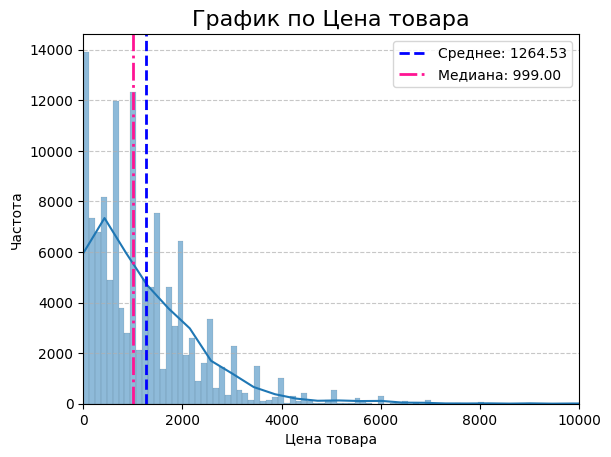

In [47]:
# Построение графика
sns.histplot(
    data=ap,
    x='price',
    kde=True,
);
plt.title(f'График по {list_field_ap["price"]}', fontsize=16)
plt.xlabel(list_field_ap["price"])
plt.ylabel('Частота');
mean_val = np.mean(ap["price"])
median_val = np.median(ap["price"])
plt.axvline(
    mean_val,
    color='blue',
    linestyle='--',
    linewidth=2,
    label=f'Среднее: {mean_val:.2f}'
)
plt.axvline(
    median_val,
    color='deeppink',
    linestyle='-.',
    linewidth=2,
    label=f'Медиана: {median_val:.2f}'
)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(0, 10000)
plt.legend()
plt.show();

**<span style='color:green'>Мини вывод:</span>**

- Основной спрос на товары меньше 2000
- больше спрос на товары с меньшей ценой

**Анализ поля: <span style='color:red'>category_ids</span>**

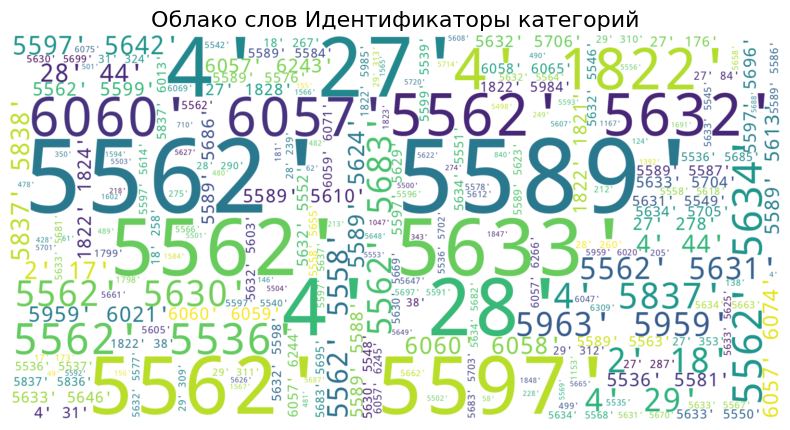

In [48]:
# Получить уникальные значения
unique_model = ap['category_ids'].unique().tolist()
# Получить строчку и уникальных значений
text_unique_model = ' '.join(unique_model)
# Подготовка к показу
wordcloud_model = WordCloud(width=1600, height=800, background_color='white', colormap='viridis').generate(text_unique_model)
# Построение композиции
plt.figure(figsize=(10, 5))
plt.title(f'Облако слов {list_field_ap["category_ids"]}', fontsize=16)
plt.imshow(wordcloud_model, interpolation='bilinear')
plt.axis('off')
plt.show()

**<span style='color:green'>Мини вывод:</span>**

- Самые популярные категории товаров `5562`, `5589`, `5597`, `4`, `27`

### Анализ данных датафрейма <span style='color:red'>am</span> по каждому признаку

In [49]:
# Показать колонки
am.columns

Index(['bulk_campaign_id', 'client_id', 'message_id', 'event', 'channel',
       'date', 'created_at'],
      dtype='object')

In [50]:
# Презинтационый список полей
list_field_am = {
    'bulk_campaign_id': 'Идентификатор рассылки',
    'client_id': 'Идентификатор клиента',
    'message_id': 'Идентификатор сообщения',
    'event': 'Действие с сообщением (отправлено, открыто, покупка…)',
    'channel': 'Канал рассылки',
    'date': 'Дата действия',
    'created_at': 'Дата-время полностью',
}

**Анализ поля: <span style='color:red'>event</span>**

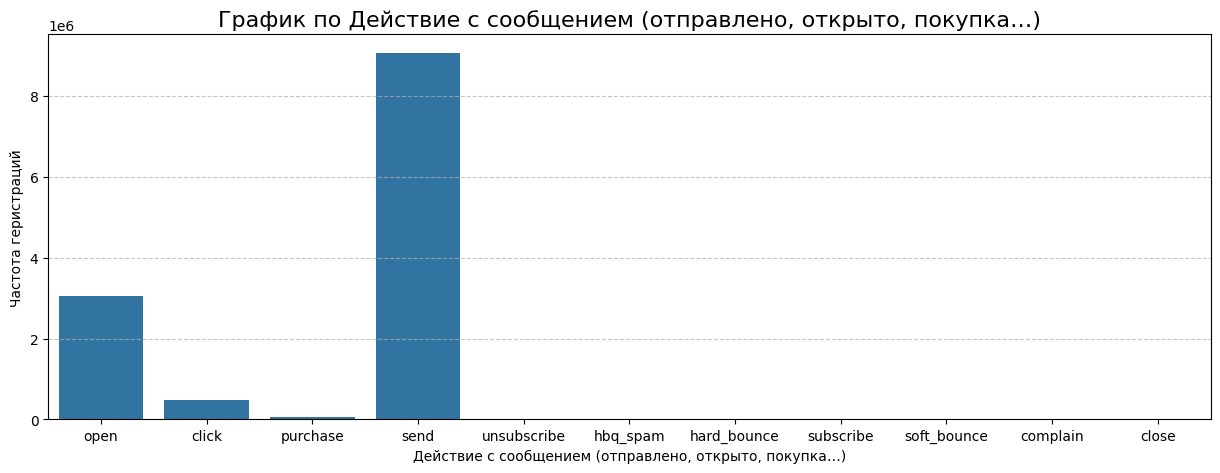

In [51]:
# Строю график
plt.figure(figsize=(15, 5))
sns.countplot(
    x='event',
    data=am
)
plt.title(f'График по {list_field_am["event"]}', fontsize=16)
plt.xlabel(list_field_am["event"])
plt.ylabel('Частота геристраций');
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**<span style='color:green'>Мини вывод:</span>**

- Отправка занемает большую часть сообщений
- Открывают 1/3 часть сообщений
- Переходят где то 1/20
- Производят покупку ещё меньше

**Анализ поля: <span style='color:red'>channel</span>**

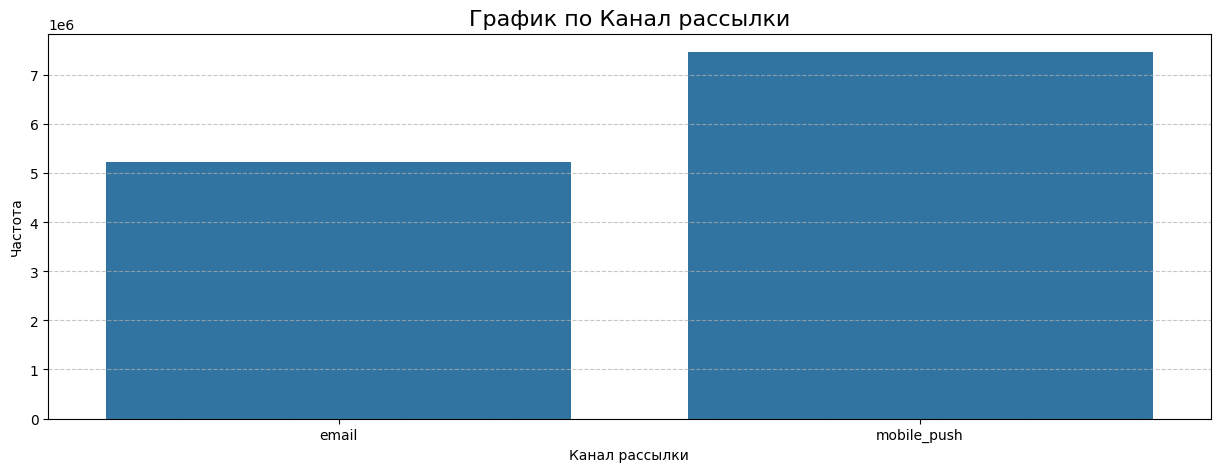

In [52]:
# Строю график
plt.figure(figsize=(15, 5))
sns.countplot(
    x='channel',
    data=am
)
plt.title(f'График по {list_field_am["channel"]}', fontsize=16)
plt.xlabel(list_field_am["channel"])
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**<span style='color:green'>Мини вывод:</span>**

- `email` расылка меньше по сравнению с `mobile_push` уведомлениями

**<span style='color:Purple'>Вывод шага:</span>**

- Восновном покупают по одному товару
- Больше 30 товаров не заказывают
- Основной спрос на товары меньше 2000
- больше спрос на товары с меньшей ценой
- Самые популярные категории товаров `5562`, `5589`, `5597`, `4`, `27`
- Отправка занемает большую часть сообщений
- Открывают 1/3 часть сообщений
- Переходят где то 1/20
- Производят покупку ещё меньше
- `email` расылка меньше по сравнению с `mobile_push` уведомлениями

## <span style='color:Blue'> Шаг. Объеденения датафреймов</span>

### Обеденяем `ap`, `am` и `atb`

In [53]:
# показ фрейма
ap.head(3)

,client_id,quantity,price,category_ids,date,message_id
0,1515915625468169594,1,"1,999.00","['4', '28', '57', '431']",2022-05-16,1515915625468169594-4301-627b661e9736d
1,1515915625468169594,1,"2,499.00","['4', '28', '57', '431']",2022-05-16,1515915625468169594-4301-627b661e9736d
2,1515915625471138230,1,"6,499.00","['4', '28', '57', '431']",2022-05-16,1515915625471138230-4437-6282242f27843


In [54]:
# показ фрейма
am.head(3)

,bulk_campaign_id,client_id,message_id,event,channel,date,created_at
0,4439,1515915625626736623,1515915625626736623-4439-6283415ac07ea,open,email,2022-05-19,2022-05-19 00:14:20
1,4439,1515915625490086521,1515915625490086521-4439-62834150016dd,open,email,2022-05-19,2022-05-19 00:39:34
2,4439,1515915625553578558,1515915625553578558-4439-6283415b36b4f,open,email,2022-05-19,2022-05-19 00:51:49


In [55]:
# показ фрейма
atb.head(3)

,client_id,target
0,1515915625468060902,False
1,1515915625468061003,True
2,1515915625468061099,False


In [56]:
# Обеденения датафреймов
full_df = pd.merge(ap, am, on=['message_id', 'client_id', 'date'], how='inner')

In [57]:
# Обеденения датафреймов
full_df = pd.merge(full_df, atb, on=['client_id'], how='inner')

In [58]:
# Показываю информацию о дата сете
primary_information_output(full_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343733 entries, 0 to 343732
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   client_id         343733 non-null  int64         
 1   quantity          343733 non-null  int64         
 2   price             343733 non-null  float64       
 3   category_ids      343733 non-null  object        
 4   date              343733 non-null  datetime64[ns]
 5   message_id        343733 non-null  object        
 6   bulk_campaign_id  343733 non-null  int64         
 7   event             343733 non-null  object        
 8   channel           343733 non-null  object        
 9   created_at        343733 non-null  datetime64[ns]
 10  target            343733 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 26.6+ MB
Количество пропущеных значений:


client_id           0
quantity            0
price               0
category_ids        0
date                0
message_id          0
bulk_campaign_id    0
event               0
channel             0
created_at          0
target              0
dtype: int64

Количество полных дублированых строк в дата фрейме = 0


,client_id,quantity,price,category_ids,date,message_id,bulk_campaign_id,event,channel,created_at,target
0,1515915625468075433,1,"1,499.00","['4', '28', '275', '421']",2022-05-19,1515915625468075433-4439-6283413d20f00,4439,purchase,email,2022-05-19 14:34:43,False
1,1515915625468075433,2,"1,999.00","['4', '28', '275', '421']",2022-05-19,1515915625468075433-4439-6283413d20f00,4439,purchase,email,2022-05-19 14:34:43,False
2,1515915625468075433,1,"1,999.00","['4', '28', '275', '421']",2022-05-19,1515915625468075433-4439-6283413d20f00,4439,purchase,email,2022-05-19 14:34:43,False
3,1515915625468145616,1,"1,499.00","['4', '28', '343', '425']",2022-05-19,1515915625468145616-4439-628341568525c,4439,purchase,email,2022-05-19 09:21:24,False
4,1515915625468213881,1,499.00,"['5562', '5536', '5581', '602']",2022-05-19,1515915625468213881-4463-6285e40c8ef7a,4463,send,email,2022-05-19 06:41:45,False


## <span style='color:Blue'> Шаг. Разработка полезных признаков</span>

**Задача 6.1. Подробный вывод датафрейма**

In [59]:
# Показываю информацию о дата сете
primary_information_output(full_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343733 entries, 0 to 343732
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   client_id         343733 non-null  int64         
 1   quantity          343733 non-null  int64         
 2   price             343733 non-null  float64       
 3   category_ids      343733 non-null  object        
 4   date              343733 non-null  datetime64[ns]
 5   message_id        343733 non-null  object        
 6   bulk_campaign_id  343733 non-null  int64         
 7   event             343733 non-null  object        
 8   channel           343733 non-null  object        
 9   created_at        343733 non-null  datetime64[ns]
 10  target            343733 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 26.6+ MB
Количество пропущеных значений:


client_id           0
quantity            0
price               0
category_ids        0
date                0
message_id          0
bulk_campaign_id    0
event               0
channel             0
created_at          0
target              0
dtype: int64

Количество полных дублированых строк в дата фрейме = 0


,client_id,quantity,price,category_ids,date,message_id,bulk_campaign_id,event,channel,created_at,target
0,1515915625468075433,1,"1,499.00","['4', '28', '275', '421']",2022-05-19,1515915625468075433-4439-6283413d20f00,4439,purchase,email,2022-05-19 14:34:43,False
1,1515915625468075433,2,"1,999.00","['4', '28', '275', '421']",2022-05-19,1515915625468075433-4439-6283413d20f00,4439,purchase,email,2022-05-19 14:34:43,False
2,1515915625468075433,1,"1,999.00","['4', '28', '275', '421']",2022-05-19,1515915625468075433-4439-6283413d20f00,4439,purchase,email,2022-05-19 14:34:43,False
3,1515915625468145616,1,"1,499.00","['4', '28', '343', '425']",2022-05-19,1515915625468145616-4439-628341568525c,4439,purchase,email,2022-05-19 09:21:24,False
4,1515915625468213881,1,499.00,"['5562', '5536', '5581', '602']",2022-05-19,1515915625468213881-4463-6285e40c8ef7a,4463,send,email,2022-05-19 06:41:45,False


**Задача 6.2. Добавление номер месяца**

In [60]:
# Получаем месяц
full_df['month'] = full_df['date'].dt.month

**Задача 6.3. Добавление время года**

In [61]:
def season_year(row):
    """
    Добавляем сезон
    """
    month = row['month']
    if month in [12, 1, 2]:
        return 'зима'
    elif month in [3, 4, 5]:
        return 'весна'
    elif month in [6, 7, 8]:
        return 'лето'
    return 'осень'

In [62]:
# Получаем сезон времени года
full_df['season'] = full_df.apply(season_year, axis=1)

**Задача 6.4. Добавление день недели**

In [63]:
# Получаем день недели 
full_df['weekday'] = full_df['date'].dt.weekday

**Задача 6.5. Добавляем рейтинк изходя из уникальных значений**

In [64]:
category_ids_counts = full_df['category_ids'].value_counts().to_dict()

In [65]:
def category_ids_to_counts(row):
    """
    Присваиваем количество значений каждому уникальному значению
    """
    rating = row['category_ids']
    return category_ids_counts[rating]

In [66]:
# Получаем рейтинг
full_df['rating'] = full_df.apply(category_ids_to_counts, axis=1)

**Задача 6.6. Проверка результата**

In [67]:
# Показываю информацию о дата сете
primary_information_output(full_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343733 entries, 0 to 343732
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   client_id         343733 non-null  int64         
 1   quantity          343733 non-null  int64         
 2   price             343733 non-null  float64       
 3   category_ids      343733 non-null  object        
 4   date              343733 non-null  datetime64[ns]
 5   message_id        343733 non-null  object        
 6   bulk_campaign_id  343733 non-null  int64         
 7   event             343733 non-null  object        
 8   channel           343733 non-null  object        
 9   created_at        343733 non-null  datetime64[ns]
 10  target            343733 non-null  bool          
 11  month             343733 non-null  int32         
 12  season            343733 non-null  object        
 13  weekday           343733 non-null  int32         
 14  rati

client_id           0
quantity            0
price               0
category_ids        0
date                0
message_id          0
bulk_campaign_id    0
event               0
channel             0
created_at          0
target              0
month               0
season              0
weekday             0
rating              0
dtype: int64

Количество полных дублированых строк в дата фрейме = 0


,client_id,quantity,price,category_ids,date,message_id,bulk_campaign_id,event,channel,created_at,target,month,season,weekday,rating
0,1515915625468075433,1,"1,499.00","['4', '28', '275', '421']",2022-05-19,1515915625468075433-4439-6283413d20f00,4439,purchase,email,2022-05-19 14:34:43,False,5,весна,3,8851
1,1515915625468075433,2,"1,999.00","['4', '28', '275', '421']",2022-05-19,1515915625468075433-4439-6283413d20f00,4439,purchase,email,2022-05-19 14:34:43,False,5,весна,3,8851
2,1515915625468075433,1,"1,999.00","['4', '28', '275', '421']",2022-05-19,1515915625468075433-4439-6283413d20f00,4439,purchase,email,2022-05-19 14:34:43,False,5,весна,3,8851
3,1515915625468145616,1,"1,499.00","['4', '28', '343', '425']",2022-05-19,1515915625468145616-4439-628341568525c,4439,purchase,email,2022-05-19 09:21:24,False,5,весна,3,6104
4,1515915625468213881,1,499.00,"['5562', '5536', '5581', '602']",2022-05-19,1515915625468213881-4463-6285e40c8ef7a,4463,send,email,2022-05-19 06:41:45,False,5,весна,3,395


## <span style='color:Blue'> Шаг. Корреляционный анализ</span>

**Задача 7.1. Создание функции для отрисовки тепловой карты</span>**

In [68]:
def heat_map_output(
    data: object,                # Дата фрейм
    list_names_col:dict= None,   # Словарь с претанзиционым наименованием
    number_of_randomness: int=0, # Количество рандомных частей
):
    """
    Функция строит теплавую карту на основании дата фрейма
    """
    if number_of_randomness == 0:
        temp_data = data
    else:
        temp_data = data.sample(number_of_randomness)
    corrective_list = list()
    if list_names_col is None:
        corrective_list = temp_data.columns
    else:
        for x in temp_data.columns:
            corrective_list.append(list_names_col[x])
    temp_data.columns = corrective_list
    quantitative_signs = (
        temp_data.select_dtypes(['float', 'int']).columns.tolist()
    )
    #plt.figure(figsize = (16,16))
    plt.title(
        "Теплавая карта коэффициенты корреляции между всеми признаками в дата фрейме\n",
        fontsize =10
    )
    sns.heatmap(
        temp_data.phik_matrix(interval_cols=quantitative_signs),
        annot=True,
        fmt='.2f'
    );

**Задача 7.2. Получаем тепловую карту <span style='color:red'>ap</span>**

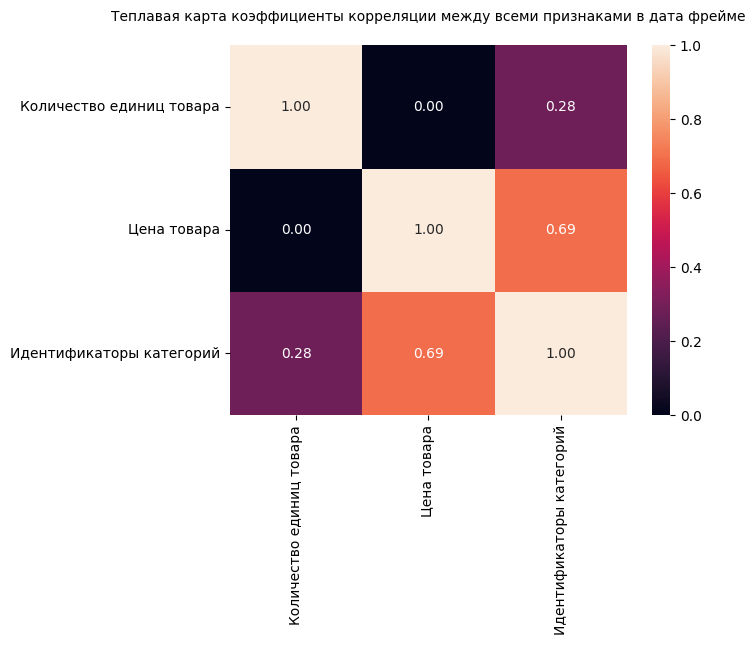

In [69]:
# Перечислим не актуальные признаки для построения
list_non_participating_features = [
    'client_id',
    'date',
    'message_id',
]
# Строим тепловую карту
heat_map_output(
    ap.drop(list_non_participating_features, axis=1),
    list_field_ap
);

**<span style='color:green'>Мини вывод:</span>**

- Будем считать что если кореляция выше или равно `0.9` то мультиколлинеарность присутствует и сетими признаками стоит поработать.
- Не присутствует мультиколлинеарность
- хороший показатель цена с категорией
- есть взаимосвязь категория с количеством

**Задача 7.3. Получаем тепловую карту <span style='color:red'>am</span>**

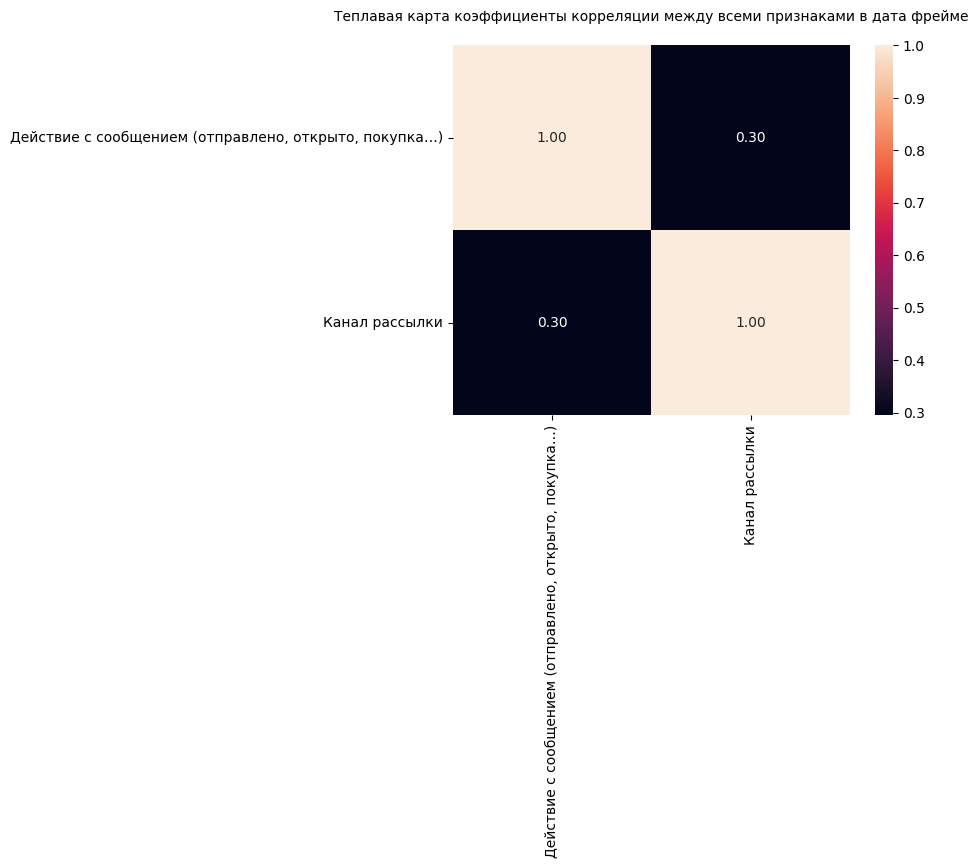

In [70]:
# Перечислим не актуальные признаки для построения
list_non_participating_features = [
    'bulk_campaign_id',
    'client_id',
    'message_id',
    'date',
    'created_at',
]
# Строим тепловую карту
heat_map_output(
    am.drop(list_non_participating_features, axis=1),
    list_field_am,
    10000,
);

**<span style='color:green'>Мини вывод:</span>**

- Будем считать что если кореляция выше или равно `0.9` то мультиколлинеарность присутствует и сетими признаками стоит поработать.
- Не присутствует мультиколлинеарность
- есть небольшая связь между каналам связи и действиями сообщением

**Задача 7.4. Получаем тепловую карту <span style='color:red'>full_df</span>**

In [71]:
# Просмотр колонок
full_df.columns

Index(['client_id', 'quantity', 'price', 'category_ids', 'date', 'message_id',
       'bulk_campaign_id', 'event', 'channel', 'created_at', 'target', 'month',
       'season', 'weekday', 'rating'],
      dtype='object')

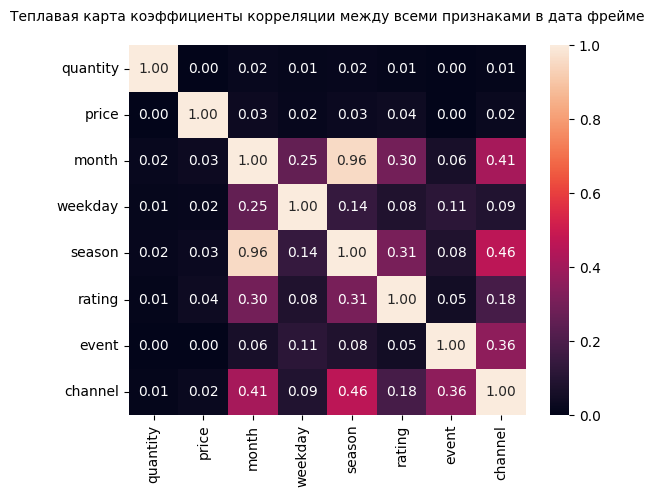

In [72]:
# Перечислим не актуальные признаки для построения
fields_selected = [
    'quantity',
    'price',
    'month',
    'weekday',
    'season',
    'rating',
    'event',
    'channel',
]
# Строим тепловую карту
heat_map_output(full_df[fields_selected]);

**<span style='color:green'>Мини вывод:</span>**

- Будем считать что если кореляция выше или равно `0.9` то мультиколлинеарность присутствует и сетими признаками стоит поработать.
- Есть где присутствует мультиколлинеарность и это очевидно между `season` и `month`
- Несильно выделяются признаки `quantity` и `price` но они важны

## <span style='color:Blue'> Шаг. Подготовка к обучению</span>

**Задача 8.1. Получаем информацию о фрейме**

In [73]:
# Просмотр для распределение признаков
primary_information_output(full_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343733 entries, 0 to 343732
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   client_id         343733 non-null  int64         
 1   quantity          343733 non-null  int64         
 2   price             343733 non-null  float64       
 3   category_ids      343733 non-null  object        
 4   date              343733 non-null  datetime64[ns]
 5   message_id        343733 non-null  object        
 6   bulk_campaign_id  343733 non-null  int64         
 7   event             343733 non-null  object        
 8   channel           343733 non-null  object        
 9   created_at        343733 non-null  datetime64[ns]
 10  target            343733 non-null  bool          
 11  month             343733 non-null  int32         
 12  season            343733 non-null  object        
 13  weekday           343733 non-null  int32         
 14  rati

client_id           0
quantity            0
price               0
category_ids        0
date                0
message_id          0
bulk_campaign_id    0
event               0
channel             0
created_at          0
target              0
month               0
season              0
weekday             0
rating              0
dtype: int64

Количество полных дублированых строк в дата фрейме = 0


,client_id,quantity,price,category_ids,date,message_id,bulk_campaign_id,event,channel,created_at,target,month,season,weekday,rating
0,1515915625468075433,1,"1,499.00","['4', '28', '275', '421']",2022-05-19,1515915625468075433-4439-6283413d20f00,4439,purchase,email,2022-05-19 14:34:43,False,5,весна,3,8851
1,1515915625468075433,2,"1,999.00","['4', '28', '275', '421']",2022-05-19,1515915625468075433-4439-6283413d20f00,4439,purchase,email,2022-05-19 14:34:43,False,5,весна,3,8851
2,1515915625468075433,1,"1,999.00","['4', '28', '275', '421']",2022-05-19,1515915625468075433-4439-6283413d20f00,4439,purchase,email,2022-05-19 14:34:43,False,5,весна,3,8851
3,1515915625468145616,1,"1,499.00","['4', '28', '343', '425']",2022-05-19,1515915625468145616-4439-628341568525c,4439,purchase,email,2022-05-19 09:21:24,False,5,весна,3,6104
4,1515915625468213881,1,499.00,"['5562', '5536', '5581', '602']",2022-05-19,1515915625468213881-4463-6285e40c8ef7a,4463,send,email,2022-05-19 06:41:45,False,5,весна,3,395


**Задача 8.2. Подготовка признаков для обучения и тестирования**

In [74]:
# Укажим целевой признак
target_attribute = 'target'
# Выбираем категориальные признаки
cat_columns = [
    #'category_ids',
    'season',
    'event',
    'channel',
]
# Выбираем количественые признаки
num_columns = [
    'quantity',
    'price',
    'month',
    'weekday',
    'rating',
]
# Собираю поля признаков
selected_fields_of_study = cat_columns + num_columns
# Добавления целевого признака
selected_fields_of_study.append(target_attribute)
# Собираю дата сет
correction_train = full_df[selected_fields_of_study]
# Делим данные на тренировачные и тестовые
X_train, X_test, y_train, y_test = train_test_split(
    correction_train.drop([target_attribute], axis=1),
    correction_train[target_attribute],
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=correction_train[target_attribute],
)

**Задача 8.3. Собираем пайплан из класификационых моделий**

In [75]:
# Создаём структуру кодирование OHE
ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
)

In [76]:
# Обеденим шаги по подготовке данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, cat_columns),
        ('num', StandardScaler(), num_columns),
    ],
    remainder='passthrough'
)

In [77]:
# Создаём словарь из 4 моделеё с параметрами
param_pl = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 13),
        'models__max_features': range(2, 13),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
    },
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 12),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
    },
    {
        'models': [SVC(random_state=RANDOM_STATE)],
        'models__C': [0.1, 1, 5, 10, 100],
        'models__gamma': [0.1, 1, 5, 10, 100],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
    },    
]

In [78]:
# Создаём итоговый пайплан
classification_pl = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE)),
    ]
)

**Задача 8.4. Собираем пайплан CatBoostClassifier**

In [79]:
# Собираем основной пайплан 
cat_pl = Pipeline([
    ('classifier', CatBoostClassifier(
        random_state=RANDOM_STATE,
        verbose=0,
        cat_features=cat_columns  # указываем категориальные признаки
    ))
])

In [80]:
# Подготовка параметров
cat_param_pl = {
    'classifier__n_estimators': randint(5, 50),
    'classifier__learning_rate': uniform(0.01, 0.3),
    'classifier__depth': randint(4, 10),
    'classifier__l2_leaf_reg': uniform(1, 10),
    'classifier__bagging_temperature': uniform(0, 1),
    'classifier__random_strength': uniform(0, 1),
    'classifier__grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide']
}

## <span style='color:Blue'> Шаг. Обучение улучшей модели</span>

**Задача 9.1. Поодготовка к сбору результатов**

In [81]:
# Создание пустого датафрейма
final_result_for_madeleine = pd.DataFrame(
    {'Наименование модели': [], 'ROC_AUC': [],}
)

**Задача 9.2. Обучение с помощью класификацией**

In [82]:
# Производим поиск по сетке всех возможных вариантов лучшей модели
best_model = RandomizedSearchCV(
    classification_pl,
    param_pl,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    n_iter=5,
    random_state=RANDOM_STATE,
)

In [83]:
# Обучение модели на тренировачной выборки
best_model.fit(X_train, y_train);

In [84]:
# Получаю результаты
result = pd.DataFrame(best_model.cv_results_)
# Вывожу результат топ 3 лучших маделей с параметрами
top_best_model = result[
    ['rank_test_score', 'param_models', 'mean_test_score', 'params']
].sort_values('rank_test_score').head(3)

In [85]:
# Получаю имя лучшей мадели 
name_best_model = result.sort_values('rank_test_score').head(1).param_models.iloc[0]

In [86]:
# Получаю лучшую модель
top_madeleine = best_model.best_estimator_
# Получаю предсказаную пробу лучшей мадели
y_test_predict_proba = top_madeleine.predict_proba(X_test)[:, 1]

In [87]:
# Предсказание с фиксацией времени
y_test_roc_auc = roc_auc_score(y_test, y_test_predict_proba)

In [88]:
# Запись результатов
final_result_for_madeleine.loc[len(final_result_for_madeleine)] = [
    name_best_model,
    y_test_roc_auc,
]

**Задача 9.3. Обучение с помощью CatBoostClassifier**

In [89]:
# Производим поиск по сетке всех возможных вариантов лучшей модели
best_model_CBC = RandomizedSearchCV(
    cat_pl,
    cat_param_pl,
    n_iter=30,                
    cv=5,                   
    scoring='roc_auc',     
    n_jobs=-1,           
    random_state=42,
    verbose=1
)

In [90]:
# Обучение модели на тренировачной выборки
best_model_CBC.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/home/oskalis/Sinhron/Lab_programista/Python_Labolatoriya/development_projects_ds/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [91]:
# Получаю лучшую модель
top_madeleine_cat = best_model_CBC.best_estimator_
# Получаю предсказаную пробу лучшей мадели
y_test_predict_proba_cat = top_madeleine_cat.predict_proba(X_test)[:, 1]

In [92]:
# Предсказание с фиксацией времени
y_test_roc_auc_cat = roc_auc_score(y_test, y_test_predict_proba_cat)

In [93]:
# Запись результатов
final_result_for_madeleine.loc[len(final_result_for_madeleine)] = [
    'CatBoostClassifier',
    y_test_roc_auc_cat,
]

## <span style='color:Blue'> Шаг. Проанализируйте модели по критериям заказчика</span>

**Задача 10.1. Обучение с помощью класификацией**

In [94]:
print('Лучшая модель и её параметры:\n\n', best_model.best_estimator_ )

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['season', 'event',
                                                   'channel']),
                                                 ('num', RobustScaler(),
                                 

In [95]:
# Показ топ 3 мадели
top_best_model

,rank_test_score,param_models,mean_test_score,params
0,1,DecisionTreeClassifier(random_state=12345),0.77,"{'preprocessor__num': RobustScaler(), 'models_..."
4,2,DecisionTreeClassifier(random_state=12345),0.73,"{'preprocessor__num': StandardScaler(), 'model..."
1,3,KNeighborsClassifier(),0.72,"{'preprocessor__num': MinMaxScaler(), 'models_..."


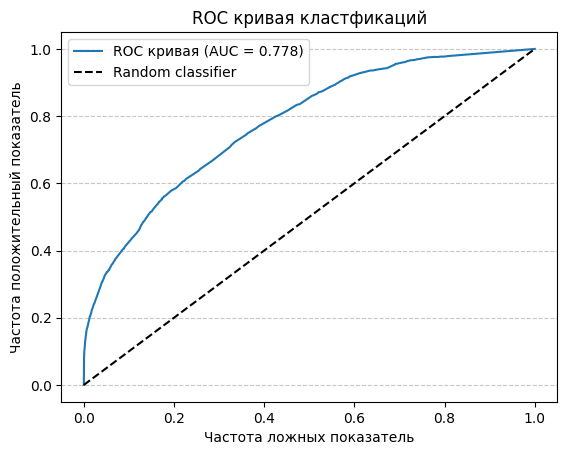

In [96]:
# Построение ROC‑кривой
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_proba)
plt.plot(fpr, tpr, label=f'ROC кривая (AUC = {y_test_roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('Частота ложных показатель')
plt.ylabel('Частота положительный показатель')
plt.title('ROC кривая кластфикаций')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

**Задача 10.2. Обучение с помощью CatBoostClassifier**

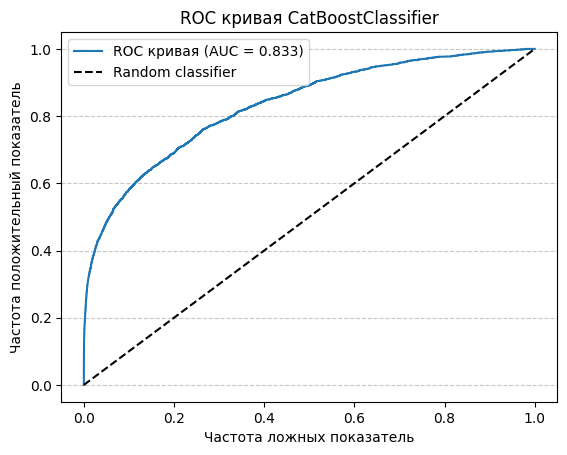

In [97]:
# Построение ROC‑кривой
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_proba_cat)
plt.plot(fpr, tpr, label=f'ROC кривая (AUC = {y_test_roc_auc_cat:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('Частота ложных показатель')
plt.ylabel('Частота положительный показатель')
plt.title('ROC кривая CatBoostClassifier')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

**Задача 10.3. Полученые результаты**

In [98]:
# Вывод полученых результатов
(final_result_for_madeleine
 .sort_values(by='ROC_AUC')
 .style
 .format({'ROC_AUC': '{:.3f}'})
 .highlight_max(color='SpringGreen', subset=['ROC_AUC'])
 .highlight_min(color='LightSalmon', subset=['ROC_AUC'])
)

,Наименование модели,ROC_AUC
0,DecisionTreeClassifier(random_state=12345),0.778
1,CatBoostClassifier,0.833


**<span style='color:green'>Мини вывод:</span>**

- 

# <span style='color:RoyalBlue'>Итоговые выводы</span>

### Анализ полученых данные:

<span style='font-size:18px'>

- Столбец `message_id` имеет трёх группавую структуру через `-`. 1) - `client_id`  2) - `bulk_campaign_id` 3) - `<Индификатор сообщения>`
- Есть дубли но эта скорей всего и за не полном представление всей таблицы
- Хорошее наименование солонок
- Разнообразных признаков очень много у датафреймов `de` и `dec`
- Отсутствуют пропуски
- Есть где можно поменять тип данных нужно расмотреть тчательнее
- У таргета значения сильно большая раздница в значениях также и у стальных категориальных данных
- По полю даты разнятся в разных вреймах
- Есть интересные показатели во собенности максимальных значений? в варфреймах `de` и `dec`
- Основные квартили в метах 25%, 50%, 75% проступают нули в варфреймах `de` и `dec`
- Нужно будет применить технологию `Bootstrap` с другими
- Покупки в основном купленые по штуке
- Товар за `1рубль` Странно это ??? 1) Возможно скидка 2) Специальное выграшное предложение 3) Возможно ошибка
- Есть постояные однотипные заказы
- Есть уникальные заказы
- Были удалены дубли

### Иследовательский анализ данных:

<span style='font-size:18px'>

- Восновном покупают по одному товару
- Больше 30 товаров не заказывают
- Основной спрос на товары меньше 2000
- больше спрос на товары с меньшей ценой
- Самые популярные категории товаров `5562`, `5589`, `5597`, `4`, `27`
- Отправка занемает большую часть сообщений
- Открывают 1/3 часть сообщений
- Переходят где то 1/20
- Производят покупку ещё меньше
- `email` расылка меньше по сравнению с `mobile_push` уведомлениями

**Таблица сравнений разных моделий:**

In [99]:
# Вывод полученых результатов
(final_result_for_madeleine
 .sort_values(by='ROC_AUC')
 .style
 .format({'ROC_AUC': '{:.3f}'})
 .highlight_max(color='SpringGreen', subset=['ROC_AUC'])
 .highlight_min(color='LightSalmon', subset=['ROC_AUC'])
)

,Наименование модели,ROC_AUC
0,DecisionTreeClassifier(random_state=12345),0.778
1,CatBoostClassifier,0.833


<span style='font-size:18px'>

- 

**Итоговый результат:**

<span style='font-size:18px'>

- 

<span style='font-size:18px'>


**Предложения по улучшению:**

<span style='font-size:18px'>

- 